# Выпускной проект по SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке.

## Цели исследования

Проанализировать базу данных крупного сервис для чтения книг по подписке. В ней содержится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

На основе изученных данных сформулировать ценностное предложение для нового продукта.

## Описание данных


**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

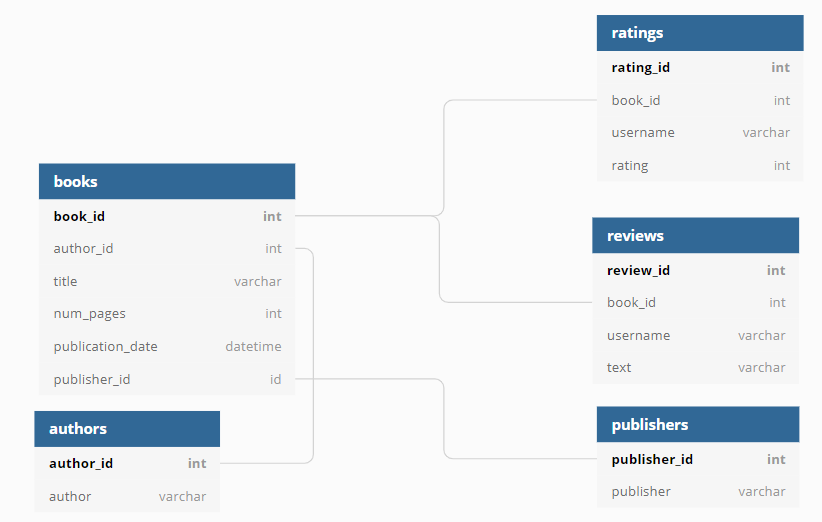

## Настройка окружения

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine 

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])


# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

# настройка длины поля
pd.options.display.max_colwidth = 100


## Функция для чтения sql из pandas

In [3]:
def selecting(query):
    return pd.io.sql.read_sql(query, con=engine)

## Обзор таблиц

In [4]:
# просмотр первых 5 строк таблицы books

books = (
"""
    SELECT *
    FROM books
    LIMIT 5;
""")

selecting(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
# просмотр первых 5 строк таблицы authors

authors = (
"""
    SELECT *
    FROM authors
    LIMIT 5;
""")

selecting(authors)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
# просмотр первых 5 строк таблицы publishers

publishers = (
"""
    SELECT *
    FROM publishers
    LIMIT 5;
""")

selecting(publishers)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
# просмотр первых 5 строк таблицы ratings

ratings = (
"""
    SELECT *
    FROM ratings
    LIMIT 5;
""")

selecting(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
# просмотр первых 5 строк таблицы reviews

reviews = (
"""
    SELECT *
    FROM reviews
    LIMIT 5;
""")

selecting(reviews)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile te...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music s...


Мы рассмотрели, как выглядят данные в таблицах: какие столбцы там есть, как наполнены базы.

## Задания

### Задание 1

Посчитайте, сколько книг вышло после 1 января 2000 года


In [9]:
books_2000 = (
"""
    SELECT COUNT(DISTINCT book_id) AS books_total
    FROM books
    WHERE publication_date > '2000-01-01';
""")

selecting(books_2000)

,books_total
0,819


После 01.01.2020 в базе содержится 819 книг с уникальными `id`.

### Задание 2

Для каждой книги посчитайте количество обзоров и среднюю оценку


In [10]:
books_rating = (
"""
    SELECT b.title AS title,
            COUNT(DISTINCT rw.text) AS reviews_count,
            AVG(r.rating) AS rating_avg
    FROM books AS b
    LEFT JOIN ratings AS r ON r.book_id = b.book_id
    LEFT JOIN reviews AS rw ON rw.book_id = b.book_id
    GROUP BY b.title
    ORDER BY reviews_count DESC,
            rating_avg DESC;
""")

selecting(books_rating)

,title,reviews_count,rating_avg
0,Memoirs of a Geisha,8,4.138462
1,Twilight (Twilight #1),7,3.662500
2,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
3,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.287500
4,The Book Thief,6,4.264151
...,...,...,...
994,Disney's Beauty and the Beast (A Little Golden Book),0,4.000000
995,Essential Tales and Poems,0,4.000000
996,Leonardo's Notebooks,0,4.000000
997,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667


Посчитали количество обзоров на все книги в базе и вывели среднюю оценку.

Количество книг в базе – 998.

* Книга с самым большим количеством текстовых обзоров – `Memoirs of a Geisha` со средней оценкой `4.13` баллов.

Судя по данным рейтингов, в приложении 5-балльная система оценки. 

### Задание 3

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [11]:
big_books = (
"""
    SELECT publisher, COUNT(b.book_id) AS big_books
    FROM publishers AS p
    LEFT JOIN books AS b ON p.publisher_id = b.publisher_id
    WHERE b.num_pages > 50
    GROUP BY publisher
    ORDER BY big_books DESC
    LIMIT 1;
""")

selecting(big_books)

,publisher,big_books
0,Penguin Books,42


Издательство, которое выпустило наибольшее число книг толще 50 страниц –  `Penguin Books` с `42` книгами.

### Задание 4
Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [12]:
great_author = (
"""
    SELECT a.author,
          ROUND(AVG(r.rating_avg_sub), 2) AS rating_avg
    FROM books AS b
    INNER JOIN (SELECT book_id, COUNT(rating) AS rating_count,
                      AVG(rating) AS rating_avg_sub
                      FROM ratings
                      GROUP BY book_id) AS r
          ON r.book_id = b.book_id
    INNER JOIN authors AS a ON a.author_id = b.author_id
    WHERE r.rating_count >= 50
    GROUP BY author
    ORDER BY rating_avg DESC
    LIMIT 1;
""")


selecting(great_author)

,author,rating_avg
0,J.K. Rowling/Mary GrandPré,4.28


Автор с самой высокой средней оценкой книг –  `J.K. Rowling/Mary GrandPré	` со средней оценкой `4.28` балла.

### Задание 5

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [13]:
avg_50_reviews = (
"""
    SELECT ROUND(AVG(sub_review.reviews_count), 2) AS reviews_avg
    FROM
        (SELECT COUNT(review_id) AS reviews_count
          FROM reviews
          WHERE username IN
             (SELECT username
              FROM ratings
              GROUP BY username
              HAVING COUNT(ratings) > 50)
          GROUP BY username) AS sub_review;
""")

selecting(avg_50_reviews)

,reviews_avg
0,24.33


В среднем пользователи, которые поставили больше 50 оценок, пишут около 24 обзоров на книги.

## Вывод

Мы провели поверзностный анализ контента приложения и выяснили моменты, которые могут помочь в его развитии.

---
1. Количество книг в базе – 998. После 01.01.2020 в базе содержится 819 книг с уникальными `id`:
* Можно спарсить базы книг конкурентов и посмотреть, насколько у нас объемная база по сравнению с ними. Сейчас по ощущениям книг не очень много;
* Довольно небольшое количество книг до 2000 года, хотя среди них должны быть очень достойные экземпляры. Чтобы заинтересовать читателей классики, точно стоит посмотреть в сторону расширения ассортимента книг до 2000 года. 

**В целом, идея с парсингом конкурентов применима для планирования будущих закупок и формирования главной страницы приложения.**

---
2. Книга с самым большим количеством текстовых обзоров – `Memoirs of a Geisha` со средней оценкой `4.13` баллов:
* Можно выставить эту книгу на первый экран приложения, чтобы заинтересовать новых пользователей. Также можно выставить и другие книги из ТОП-5 или ТОП-10;
* Жанры топовых книг могут подсказать портрет среднего читателя приложения, что позволит маркетологам продумать тарегтированную рекламу на подобную ЦА.

---
3. Издательство, которое выпустило наибольшее число книг толще 50 страниц –  `Penguin Books` с `42` книгами.
* Можно провести дополнительные анализ по книгам от этого издателя. Так ли он хорош, стоит ли продолжать сотрудничать по закупкам с ним, или же книги от него просто были выгодны по цене, но при этом не популярны у читателей.
---
4. Автор с самой высокой средней оценкой книг –  `J.K. Rowling/Mary GrandPré	` со средней оценкой `4.28` балла.
* Известный во всем мире автор, по возможности нужно расширить ассортимент книг от этого писателя;
* Также нужно посмотреть, что читают пользователи, поставившие высокую оценку данному автору, чтобы положить начало системе рекомендаций.
---
5. В среднем пользователи, которые поставили больше 50 оценок, пишут около 24 обзоров на книги.
* Можно провести дополнительный анализ данных и посмотреть, влияют ли текстовые отзывы на продажи. Если обнаружится корреляция – можно продумать программы лояльности для активных авторов, стимулировать их писать отзывы чаще.
